In [57]:
import pandas as pd
import numpy as np

# Load the csv file
df = pd.read_csv('C:\\Users\\User\\Desktop\\Machine Learning\\Assignment\\train.csv')

# Manage the x and y features
X = df.drop(['Patient Id', 'Patient First Name', 'Family Name', 'Father\'s name', 'Institute Name', 'Location of Institute', 'Status', 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5',  'Parental consent', 'Follow-up', 'Place of birth', 'Assisted conception IVF/ART', 'No. of previous abortion', 'Genetic Disorder', 'Disorder Subclass'], axis=1)
y = df[['Genetic Disorder', 'Disorder Subclass']]


# Delete rows without target
df.dropna(axis=0, subset=['Disorder Subclass'], inplace=True)

# Check the shape of X and y features
print('X:', X.shape) 
print('Output size: ', y.shape)


X: (22083, 26)
Output size:  (22083, 2)


In [58]:
# Check the missing values for each column in X
print('Total number of missing val in each columns for X features: ')
for column in X.columns:
        missing_values = X[column].isnull().sum()
        print(f"{column} :  {missing_values}")

Total number of missing val in each columns for X features: 
Patient Age :  1427
Genes in mother's side :  0
Inherited from father :  306
Maternal gene :  2810
Paternal gene :  0
Blood cell count (mcL) :  0
Mother's age :  6036
Father's age :  5986
Respiratory Rate (breaths/min) :  2149
Heart Rate (rates/min :  2113
Gender :  2173
Birth asphyxia :  2139
Autopsy shows birth defect (if applicable) :  1026
Folic acid details (peri-conceptional) :  2117
H/O serious maternal illness :  2152
H/O radiation exposure (x-ray) :  2153
H/O substance abuse :  2195
History of anomalies in previous pregnancies :  2172
Birth defects :  2154
White Blood cell count (thousand per microliter) :  2148
Blood test result :  2145
Symptom 1 :  2155
Symptom 2 :  2222
Symptom 3 :  2101
Symptom 4 :  2113
Symptom 5 :  2153


In [45]:
# Check the missing values for each column in y
print('Total number of missing val in each columns for y: ')
for column in y.columns:
        missing_val = y[column].isnull().sum()
        print(f"{column} :  {missing_val}")

Total number of missing val in each columns for y: 
Genetic Disorder :  2146
Disorder Subclass :  2168


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Respiratory Rate (breaths/min)                    19934 non-null  object 
 9   Heart Rate (rates

In [47]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Genetic Disorder   19937 non-null  object
 1   Disorder Subclass  19915 non-null  object
dtypes: object(2)
memory usage: 345.2+ KB


In [54]:
df.describe(include='object').T

,count,unique,top,freq
Patient Id,22083,22083,PID0x6418,1
Genes in mother's side,22083,2,Yes,13143
Inherited from father,21777,2,No,13133
Maternal gene,19273,2,Yes,10647
Paternal gene,22083,2,No,12508
Patient First Name,22083,2524,James,420
Family Name,12392,6282,Smith,157
Father's name,22083,16368,Clardie,6
Institute Name,16977,27,Not applicable,8440
Location of Institute,22083,26,-,10931


In [51]:
# Check unique values for each columns
for col in X.columns:
    if X[col].dtypes == 'object':
        print(f'Column: {col}')
        print(f'Unique values: {X[col].unique()}')
        #print(X[col].value_counts())
        print('*' * 40)
        print('\n')
     

Column: Genes in mother's side
Unique values: ['Yes' 'No']
****************************************


Column: Inherited from father
Unique values: ['No' 'Yes' nan]
****************************************


Column: Maternal gene
Unique values: ['Yes' 'No' nan]
****************************************


Column: Paternal gene
Unique values: ['No' 'Yes']
****************************************


Column: Respiratory Rate (breaths/min)
Unique values: ['Normal (30-60)' 'Tachypnea' nan]
****************************************


Column: Heart Rate (rates/min
Unique values: ['Normal' 'Tachycardia' nan]
****************************************


Column: Gender
Unique values: [nan 'Male' 'Female' 'Ambiguous']
****************************************


Column: Birth asphyxia
Unique values: [nan 'No' 'No record' 'Not available' 'Yes']
****************************************


Column: Autopsy shows birth defect (if applicable)
Unique values: ['Not applicable' 'None' 'No' 'Yes' nan]
**************

In [52]:
# Check unique values for each columns
for col in y.columns:
    if y[col].dtypes == 'object':
        print(f'Column: {col}')
        print(f'Unique values: {y[col].unique()}')
        #print(y[col].value_counts())
        print('*' * 40)
        print('\n')
     

Column: Genetic Disorder
Unique values: ['Mitochondrial genetic inheritance disorders' nan
 'Multifactorial genetic inheritance disorders'
 'Single-gene inheritance diseases']
****************************************


Column: Disorder Subclass
Unique values: ["Leber's hereditary optic neuropathy" 'Cystic fibrosis' 'Diabetes'
 'Leigh syndrome' 'Cancer' 'Tay-Sachs' 'Hemochromatosis'
 'Mitochondrial myopathy' nan "Alzheimer's"]
****************************************




In [68]:
# Preparation for standardization
num_col = [col for col in X if X[col].dtypes in ['int', 'float']]
num_col  

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

In [69]:
# List out the columns with output values of 0 and 1
bin_col = [col for col in num_col if sorted(list(df[col].value_counts().index)) == [0, 1]]
bin_col

['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']

In [70]:
col_to_standardized = num_col.copy()
col_to_standardized

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

In [71]:
for i in bin_col:
    col_to_standardized.remove(i)

col_to_standardized

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'White Blood cell count (thousand per microliter)']

# Data Preparation and Visualization

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

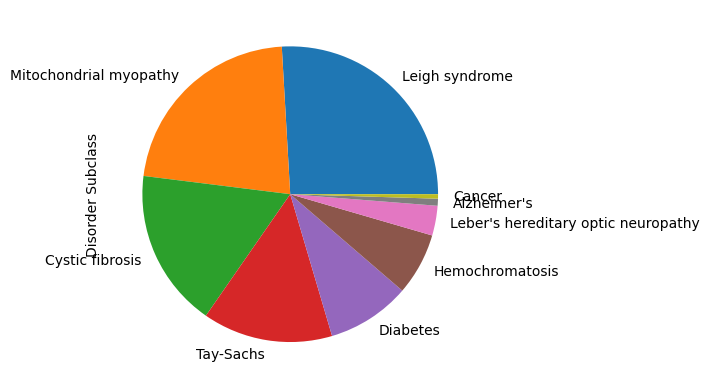

In [76]:
df['Disorder Subclass'].value_counts().plot(kind='pie')
print('\n')
df['Disorder Subclass'].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic Disorder, dtype: int64

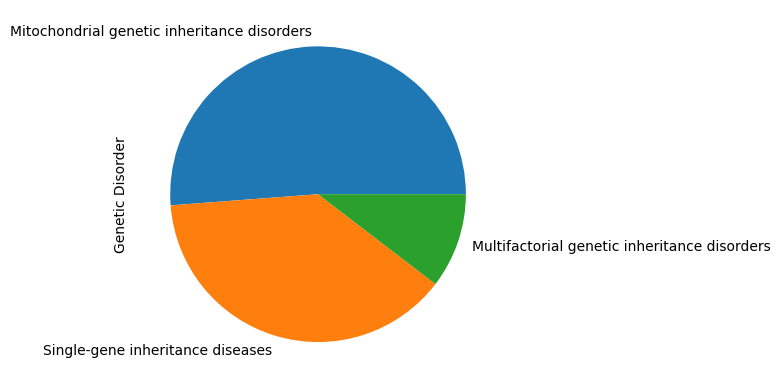

In [79]:
df['Genetic Disorder'].value_counts().plot(kind='pie')
print('\n')
df['Genetic Disorder'].value_counts()